<a href="https://colab.research.google.com/github/Alfaturachman/Alfaturachman/blob/main/fonostetoskogram_screening_pre_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import os
import glob
from scipy import signal

In [ ]:
# Langkah 1: Load Data
def load_audio(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        print(f"Loaded {file_path} with sample rate {sr}")

        if sr < 6000:
            print(f"Warning: Sample rate {sr} is too low, resampling to 8000 Hz")
            y, sr = librosa.load(file_path, sr=8000)
        return y, sr
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return np.array([]), 0

# Langkah 2: Filter (Hapus Noise)
def apply_filter(y, sr):
    if len(y) < 10:  # Misalnya, minimal 10 sampel
        print("Signal too short for filtering, skipping.")
        return y

    lowcut = 300
    highcut = min(3000, sr * 0.45)
    nyquist = 0.5 * sr
    low = lowcut / nyquist
    high = highcut / nyquist

    if low <= 0 or high >= 1:
        raise ValueError(f"Invalid cutoff frequencies: low={low}, high={high}. Adjust sample rate or cutoff.")

    b, a = signal.butter(4, [low, high], btype='band')
    y_filtered = signal.filtfilt(b, a, y)
    return y_filtered

# Langkah 3: Amplify (Perjelas Sinyal)
def amplify_signal(y, factor=2.0):
    return np.clip(y * factor, -1.0, 1.0)

# Langkah 4: End-Point Detection (Identifikasi Bagian Utama)
def detect_endpoints(y, threshold=0.01):  # Coba turunkan threshold
    endpoints = np.where(np.abs(y) > threshold)[0]
    if len(endpoints) == 0:
        print("No significant signal detected.")
        return np.array([])
    return y[endpoints[0]:endpoints[-1]]

# Langkah 5: Visualisasi Sinyal
def plot_signal(y, sr, title):
    plt.figure(figsize=(12, 4))
    if len(y) > 0:
        librosa.display.waveshow(y, sr=sr)
    else:
        plt.text(0.5, 0.5, "No Signal Detected", fontsize=12, ha="center")
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

# Langkah 6: Proses Data
def process_audio(file_path, label):
    print(f"\nProcessing {label} audio...")

    # Load audio
    y, sr = load_audio(file_path)
    process_and_print(y, sr, label, "Original Signal")

    # Apply filter
    y_filtered = apply_filter(y, sr)
    process_and_print(y_filtered, sr, label, "Filtered Signal")

    # Amplify signal
    y_amplified = amplify_signal(y_filtered)
    process_and_print(y_amplified, sr, label, "Amplified Signal")

    # Detect endpoints
    y_endpoints = detect_endpoints(y_amplified)
    process_and_print(y_endpoints, sr, label, "End-Point Detection")

def process_and_print(y, sr, label, stage):
    plot_signal(y, sr, f"{stage} ({label})")
    data_list = signal_to_list(y)
    print_signal_data(stage, data_list, label)

def signal_to_list(y):
    return [(i, float(y[i])) for i in range(len(y))]

def print_signal_data(stage, data_list, label):
    print(f"{stage} Data ({label}):\n", data_list[:10], "...\n")

    print(f"val {stage.replace(' ', '').lower()}Data = listOf(")
    for i, v in data_list[:10]:  # Gantilah [:10] dengan [:] jika ingin semua data
        print(f"    Entry({i}f, {v:.4f}f),")
    print(")")

**Healty**


Processing Healthy audio...
Loaded healthy.wav with sample rate 2000


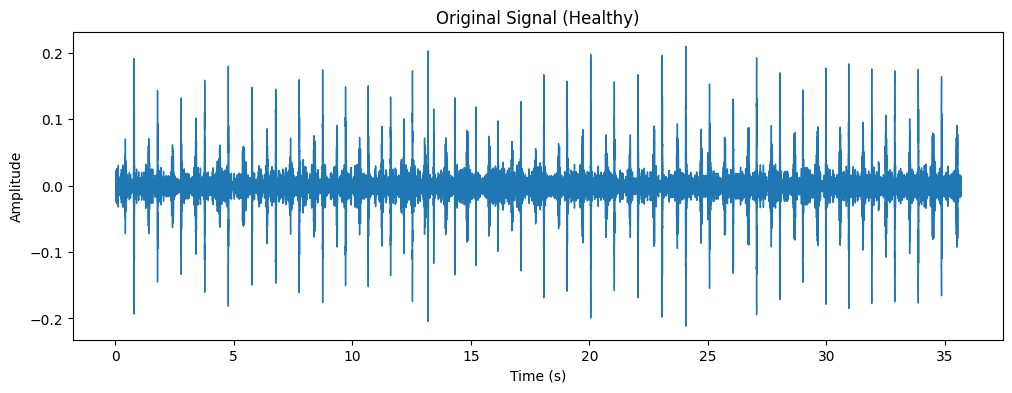

Original Signal Data (Healthy):
 [(0, -0.002022841479629278), (1, -0.002668074332177639), (2, -0.0032932073809206486), (3, -0.003831732552498579), (4, -0.004205713048577309), (5, -0.004340619780123234), (6, -0.004188060760498047), (7, -0.0037487619556486607), (8, -0.003085810225456953), (9, -0.0023198609706014395)] ...

val originalsignalData = listOf(
    Entry(0f, -0.0020f),
    Entry(1f, -0.0027f),
    Entry(2f, -0.0033f),
    Entry(3f, -0.0038f),
    Entry(4f, -0.0042f),
    Entry(5f, -0.0043f),
    Entry(6f, -0.0042f),
    Entry(7f, -0.0037f),
    Entry(8f, -0.0031f),
    Entry(9f, -0.0023f),
)


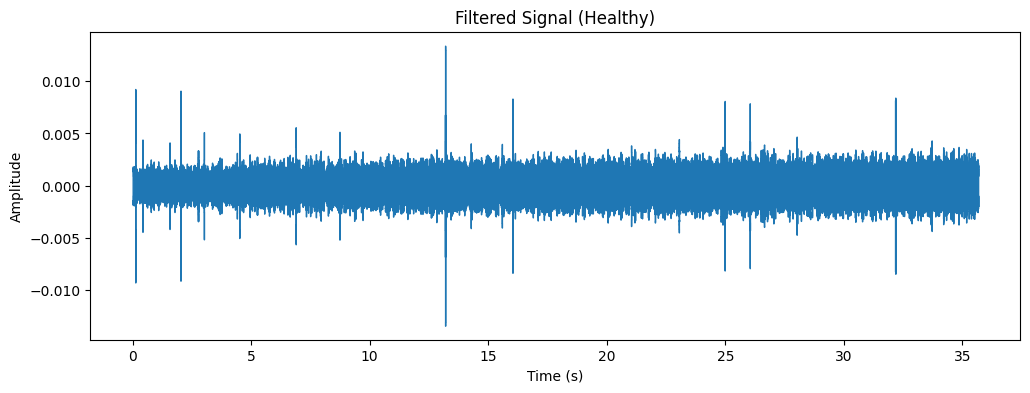

Filtered Signal Data (Healthy):
 [(0, -1.6135870310289785e-05), (1, -0.0005049783786606305), (2, -0.0009824110773930831), (3, -0.0013927011078868807), (4, -0.00166234807381324), (5, -0.0017250439665420984), (6, -0.0015355431276436534), (7, -0.0010970994431856187), (8, -0.0004740030918177346), (9, 0.00021492349863747273)] ...

val filteredsignalData = listOf(
    Entry(0f, -0.0000f),
    Entry(1f, -0.0005f),
    Entry(2f, -0.0010f),
    Entry(3f, -0.0014f),
    Entry(4f, -0.0017f),
    Entry(5f, -0.0017f),
    Entry(6f, -0.0015f),
    Entry(7f, -0.0011f),
    Entry(8f, -0.0005f),
    Entry(9f, 0.0002f),
)


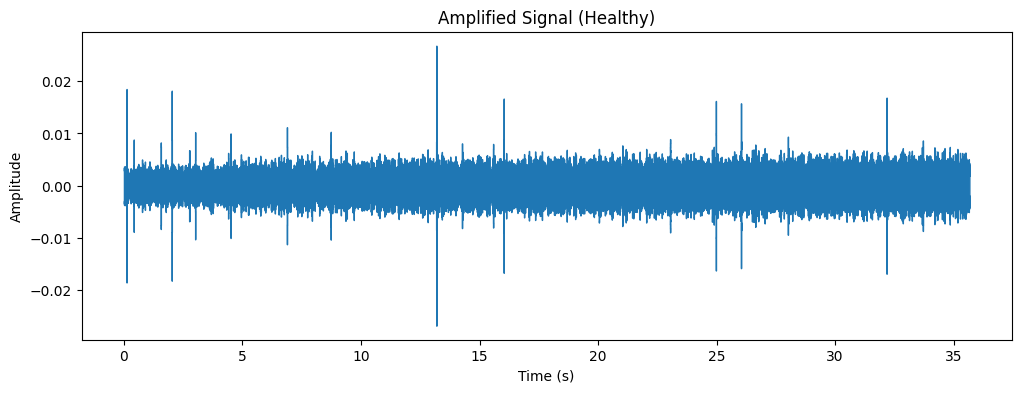

Amplified Signal Data (Healthy):
 [(0, -3.227174062057957e-05), (1, -0.001009956757321261), (2, -0.0019648221547861663), (3, -0.0027854022157737615), (4, -0.00332469614762648), (5, -0.003450087933084197), (6, -0.0030710862552873067), (7, -0.0021941988863712373), (8, -0.0009480061836354692), (9, 0.00042984699727494546)] ...

val amplifiedsignalData = listOf(
    Entry(0f, -0.0000f),
    Entry(1f, -0.0010f),
    Entry(2f, -0.0020f),
    Entry(3f, -0.0028f),
    Entry(4f, -0.0033f),
    Entry(5f, -0.0035f),
    Entry(6f, -0.0031f),
    Entry(7f, -0.0022f),
    Entry(8f, -0.0009f),
    Entry(9f, 0.0004f),
)


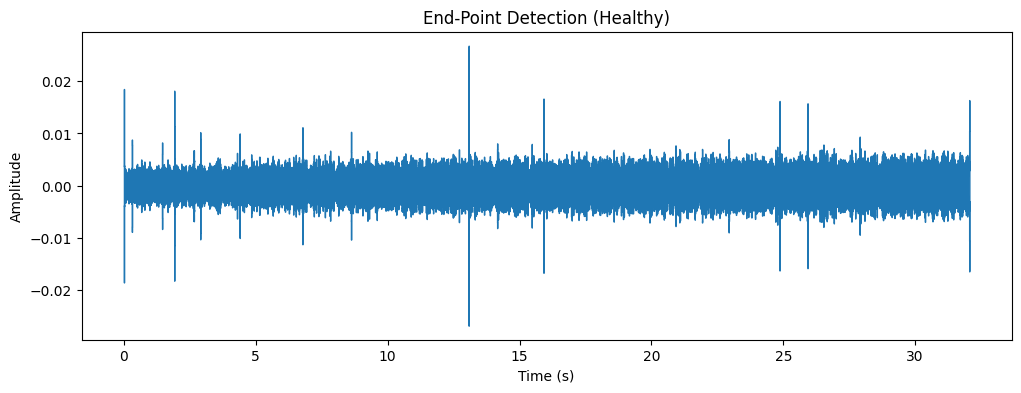

End-Point Detection Data (Healthy):
 [(0, 0.010247588103178919), (1, 0.010497891329115163), (2, 0.008306803590424608), (3, 0.003555172474236302), (4, -0.0030559808972478817), (5, -0.010091068139454748), (6, -0.015763255707795402), (7, -0.018495874393104517), (8, -0.017456872826439394), (9, -0.012858786006263175)] ...

val end-pointdetectionData = listOf(
    Entry(0f, 0.0102f),
    Entry(1f, 0.0105f),
    Entry(2f, 0.0083f),
    Entry(3f, 0.0036f),
    Entry(4f, -0.0031f),
    Entry(5f, -0.0101f),
    Entry(6f, -0.0158f),
    Entry(7f, -0.0185f),
    Entry(8f, -0.0175f),
    Entry(9f, -0.0129f),
)


In [ ]:
# Jalankan untuk file Healthy
process_audio("healthy.wav", "Healthy")

**Unhealty**


Processing Unhealthy audio...
Loaded unhealthy.wav with sample rate 2000


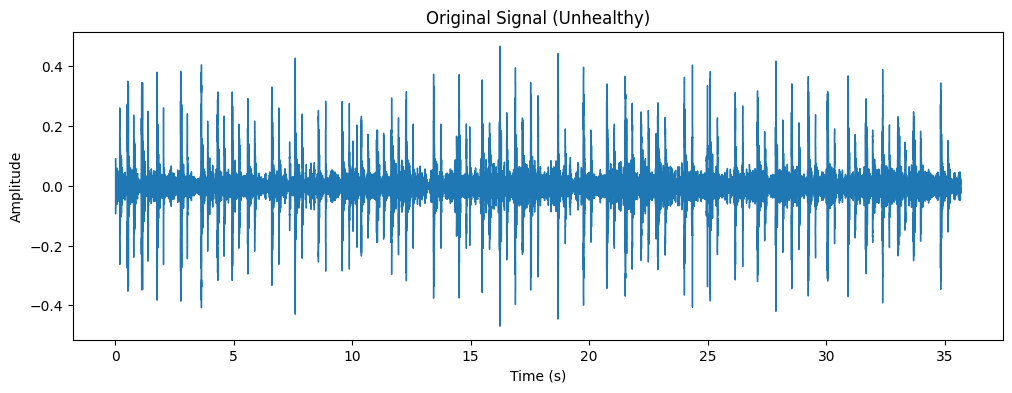

Original Signal Data (Unhealthy):
 [(0, 0.04502048343420029), (1, 0.061990972608327866), (2, 0.07667440176010132), (3, 0.08701084554195404), (4, 0.09210488200187683), (5, 0.09244255721569061), (6, 0.08963271975517273), (7, 0.08578114956617355), (8, 0.08274605870246887), (9, 0.08156093209981918)] ...

val originalsignalData = listOf(
    Entry(0f, 0.0450f),
    Entry(1f, 0.0620f),
    Entry(2f, 0.0767f),
    Entry(3f, 0.0870f),
    Entry(4f, 0.0921f),
    Entry(5f, 0.0924f),
    Entry(6f, 0.0896f),
    Entry(7f, 0.0858f),
    Entry(8f, 0.0827f),
    Entry(9f, 0.0816f),
)


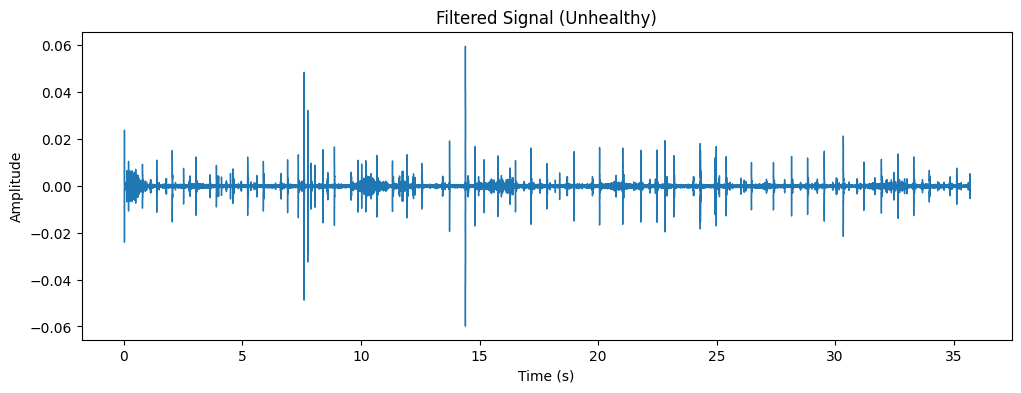

Filtered Signal Data (Unhealthy):
 [(0, 5.561552045758953e-05), (1, 0.010780123192842607), (2, 0.01934913969677983), (3, 0.02386577153668307), (4, 0.023523045868384104), (5, 0.01893960122604257), (6, 0.011795484538597995), (7, 0.00425804606739236), (8, -0.0017708705506058933), (9, -0.005253873348205307)] ...

val filteredsignalData = listOf(
    Entry(0f, 0.0001f),
    Entry(1f, 0.0108f),
    Entry(2f, 0.0193f),
    Entry(3f, 0.0239f),
    Entry(4f, 0.0235f),
    Entry(5f, 0.0189f),
    Entry(6f, 0.0118f),
    Entry(7f, 0.0043f),
    Entry(8f, -0.0018f),
    Entry(9f, -0.0053f),
)


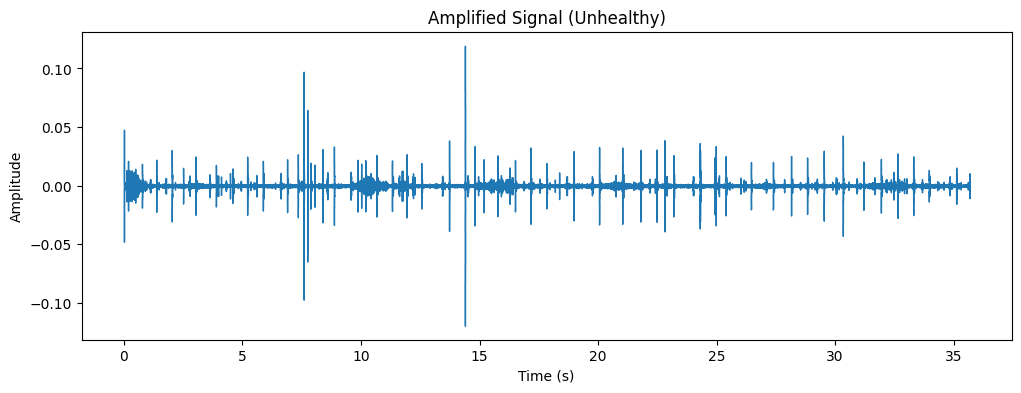

Amplified Signal Data (Unhealthy):
 [(0, 0.00011123104091517906), (1, 0.021560246385685215), (2, 0.03869827939355966), (3, 0.04773154307336614), (4, 0.04704609173676821), (5, 0.03787920245208514), (6, 0.02359096907719599), (7, 0.00851609213478472), (8, -0.0035417411012117865), (9, -0.010507746696410613)] ...

val amplifiedsignalData = listOf(
    Entry(0f, 0.0001f),
    Entry(1f, 0.0216f),
    Entry(2f, 0.0387f),
    Entry(3f, 0.0477f),
    Entry(4f, 0.0470f),
    Entry(5f, 0.0379f),
    Entry(6f, 0.0236f),
    Entry(7f, 0.0085f),
    Entry(8f, -0.0035f),
    Entry(9f, -0.0105f),
)


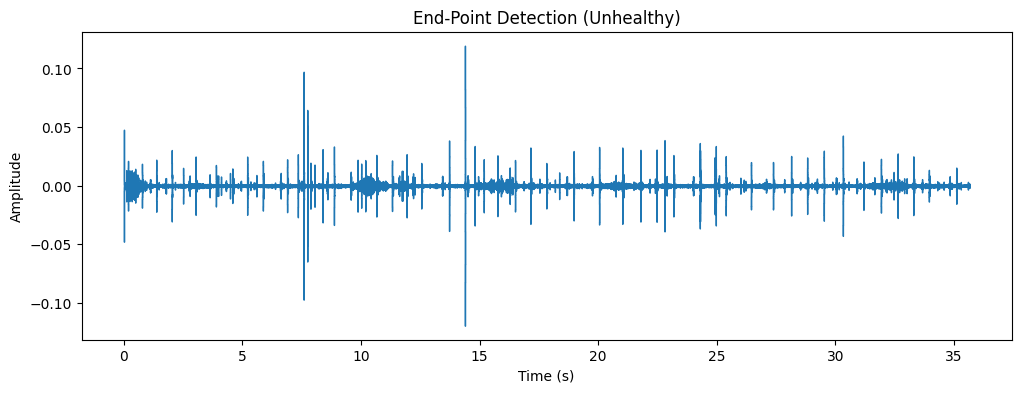

End-Point Detection Data (Unhealthy):
 [(0, 0.021560246385685215), (1, 0.03869827939355966), (2, 0.04773154307336614), (3, 0.04704609173676821), (4, 0.03787920245208514), (5, 0.02359096907719599), (6, 0.00851609213478472), (7, -0.0035417411012117865), (8, -0.010507746696410613), (9, -0.012389410242078125)] ...

val end-pointdetectionData = listOf(
    Entry(0f, 0.0216f),
    Entry(1f, 0.0387f),
    Entry(2f, 0.0477f),
    Entry(3f, 0.0470f),
    Entry(4f, 0.0379f),
    Entry(5f, 0.0236f),
    Entry(6f, 0.0085f),
    Entry(7f, -0.0035f),
    Entry(8f, -0.0105f),
    Entry(9f, -0.0124f),
)


In [ ]:
# Jalankan untuk file Unhealthy
process_audio("unhealthy.wav", "Unhealthy")

Klasifikasi Dataset Training Menggunakan Machine Learning - Random Forest
Agar bisa mengklasifikasikan suara ke dalam kategori Crepitations, Wheezes, Crackles, dan Bronchial, kita perlu mengekstrak fitur penting dari sinyal suara. Beberapa fitur yang bisa digunakan:

Mel-Frequency Cepstral Coefficients (MFCCs) → Mengambil karakteristik frekuensi suara.
Short-Time Fourier Transform (STFT) → Melihat perubahan spektrum waktu-ke-waktu.
Spectral Centroid, Bandwidth, Contrast → Mengukur distribusi energi frekuensi.
Zero-Crossing Rate (ZCR) → Mengukur jumlah perubahan tanda pada sinyal.
Root Mean Square Energy (RMSE) atau Loudness (dB) → Mengukur intensitas suara (bisa dikonversi ke desibel).

In [110]:
# Fungsi untuk ekstraksi fitur audio
def extract_features(y, sr):
    # MFCC
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)

    # Zero-Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y)
    zcr_mean = np.mean(zcr)

    # Spectral Features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr, fmin=50.0, n_bands=4))

    # Gabungkan semua fitur
    features = np.hstack([mfccs_mean, zcr_mean, spectral_centroid, spectral_bandwidth, spectral_contrast])
    return features

# Mapping dari Sound type ke label
sound_type_mapping = {
    "I": "Inspiratory",
    "E": "Experiatory",
    "W": "Wheezes",
    "C": "Crackles",
    "B": "Bronchial",
    "N": "Normal",
    "Crep": "Crepitations",
    "Bronchial": "Bronchial"
}

# Baca dataset dari file Excel
excel_file = "Data annotation.xlsx"  # Ganti dengan path file Excel Anda
df = pd.read_excel(excel_file)

# Bersihkan dataset
df = df.dropna(subset=['Sound type', 'Location', 'Age', 'Gender', 'Diagnosis'])
df['Location'] = df['Location'].str.strip()
df['Sound type'] = df['Sound type'].str.strip()

# Simpan data
data = {"file_path": [], "label": [], "age": [], "gender": []}

for index, row in df.iterrows():
    age = int(row['Age'])
    gender = row['Gender'].strip()
    diagnosis = row['Diagnosis'].strip()
    sound_types = row['Sound type'].split()

    # Format file name yang dicari (tanpa Location)
    file_name_pattern = f"*{index+1}_{diagnosis},{' '.join(sound_types)},*,{age},{gender}.wav"
    matched_files = glob.glob(file_name_pattern, recursive=True)

    if not matched_files:
        continue

    file_path = matched_files[0]  # Ambil file yang cocok pertama
    labels = [sound_type_mapping.get(st, "Unknown") for st in sound_types]
    label = ", ".join(labels)

    data["file_path"].append(file_path)
    data["label"].append(label)
    data["age"].append(age)
    data["gender"].append(1 if gender == "M" else 0)  # Gender: M = 1, F = 0

# Ekstraksi fitur
X = []
y = []
total_files_processed = 0  # Tambahkan variabel untuk menghitung total file yang diproses

for file_path, label, age, gender in zip(data["file_path"], data["label"], data["age"], data["gender"]):
    if os.path.exists(file_path):
        y_audio, sr_audio = librosa.load(file_path, sr=None)
        features = extract_features(y_audio, sr_audio)

        # Gabungkan fitur audio dengan usia dan gender
        combined_features = np.append(features, [age, gender])

        X.append(combined_features)
        y.append(label)
        total_files_processed += 1  # Tambah counter setiap file berhasil diproses
        print(f"File {file_path} diproses. Fitur: {len(combined_features)}")
    else:
        print(f"File {file_path} tidak ditemukan. Dilewati.")

if len(X) == 0 or len(y) == 0:
    raise ValueError("Tidak ada data yang valid untuk diproses.")

# Cetak total file WAV yang diproses
print(f"Total file WAV yang diproses: {total_files_processed}")

# Konversi ke NumPy array
X = np.array(X)

# Encoding label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalisasi fitur numerik (Age dan Gender)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {acc:.2f}")

File BP1_Asthma,I E W,P L L,70,M.wav diproses. Fitur: 19
File BP6_Plueral Effusion,I C B,P L R,81,M.wav diproses. Fitur: 19
File DP8_Plueral Effusion,I C B,P L L,70,M.wav diproses. Fitur: 19
File BP10_Asthma,E W,P R U,59,M.wav diproses. Fitur: 19
File BP11_Heart Failure,C,P L L,53,M.wav diproses. Fitur: 19
File BP12_Asthma,E W,P L L,50,F.wav diproses. Fitur: 19
File BP13_Heart Failure,C,P L L,55,M.wav diproses. Fitur: 19
File BP14_Heart Failure,C,A R M,54,M.wav diproses. Fitur: 19
File BP15_Asthma,E W,P R U,49,F.wav diproses. Fitur: 19
File BP16_heart failure,C,P R U,56,M.wav diproses. Fitur: 19
File BP17_COPD,E W,A R M,57,M.wav diproses. Fitur: 19
File BP18_pneumonia,C,P R U,57,M.wav diproses. Fitur: 19
File BP19_heart failure,C,P R U,70,F.wav diproses. Fitur: 19
File BP20_Asthma and lung fibrosis,C,A R M,90,M.wav diproses. Fitur: 19
File BP21_BRON,Crep,P R L,20,M.wav diproses. Fitur: 19
File BP22_BRON,Crep,P R U,24,M.wav diproses. Fitur: 19
File BP23_Lung Fibrosis,Crep,P R L,50,M.wav

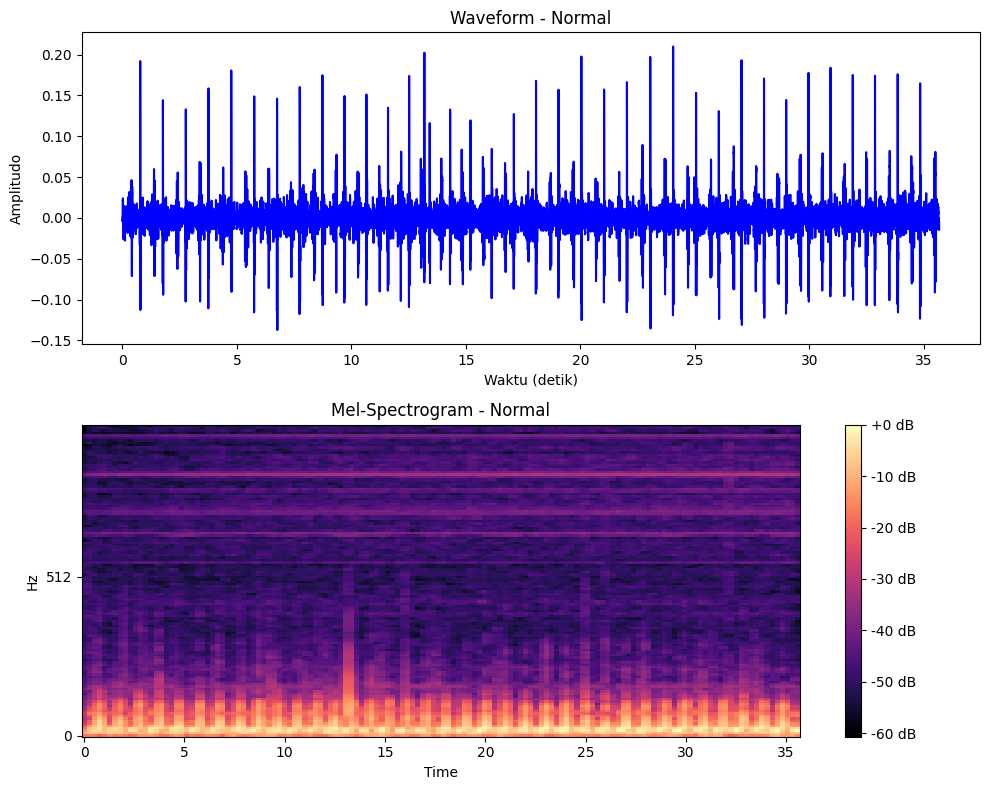

Hasil Klasifikasi: Normal
Intensitas Suara: -33.16 dB


In [114]:
# 📌 Fungsi untuk menghitung intensitas suara dalam dB
def calculate_intensity(y):
    return 10 * np.log10(np.mean(y**2) + 1e-10)  # Menghindari log(0)

# 📌 Fungsi untuk menampilkan grafik Waveform dan Mel-Spectrogram
def plot_audio_features(file_path, predicted_label):
    if not os.path.exists(file_path):
        print(f"File {file_path} tidak ditemukan.")
        return

    # Muat file audio
    y, sr = librosa.load(file_path, sr=None)

    # Hitung intensitas suara dalam dB
    db_value = calculate_intensity(y)

    # Buat figure untuk visualisasi
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # Plot Waveform
    ax[0].plot(np.linspace(0, len(y)/sr, num=len(y)), y, color='b')
    ax[0].set_title(f"Waveform - {predicted_label}")
    ax[0].set_xlabel("Waktu (detik)")
    ax[0].set_ylabel("Amplitudo")

    # Plot Mel-Spectrogram
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=sr/2)
    mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)

    img = librosa.display.specshow(mel_spect_db, sr=sr, x_axis="time", y_axis="mel", ax=ax[1])
    ax[1].set_title(f"Mel-Spectrogram - {predicted_label}")
    fig.colorbar(img, ax=ax[1], format="%+2.0f dB")

    # Tampilkan hasil
    plt.tight_layout()
    plt.show()

    # Tampilkan hasil klasifikasi dan intensitas suara
    print(f"Hasil Klasifikasi: {predicted_label}")
    print(f"Intensitas Suara: {db_value:.2f} dB")

# Contoh Penggunaan
new_audio = "healthy.wav"
predicted_label = predict_audio_label(new_audio)

if predicted_label:
    plot_audio_features(new_audio, predicted_label)